In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
filepath = '/content/drive/MyDrive/codehouse/second_day.csv'

In [63]:
# Importing Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [64]:
df = pd.read_csv(filepath)

In [65]:
df.head(10)

,Unnamed: 0,tweets_text_processed
0,0,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...
7,7,vmware is the leader
8,8,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             254 non-null    int64 
 1   tweets_text_processed  249 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.1+ KB
None


**DATA CLEANING**

In [67]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [68]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [69]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweets_text_processed'], "@[\w]*")
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [70]:
df.head(50)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [71]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [72]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [73]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [74]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [75]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [76]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [77]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [78]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [79]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [80]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [81]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [82]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df.head(10)

,Unnamed: 0,tweets_text_processed,clean_tweet
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy
2,2,day of was a success two more days of fun and ...,day of was a success two more days of fun and ...
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del a travs del uso de un poco...
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gav...
7,7,vmware is the leader,vmware is the leader
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...


In [83]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['clean_tweet'][0:5]

0    not to be confused with vaai both work with ar...
1         me and of my closest friends happy and happy
2    day of was success two more days of fun and fa...
3    el tratamiento del travs del uso de un poco de...
4    interested in testing out some of these produc...
Name: clean_tweet, dtype: object

In [84]:
from textblob import TextBlob

In [85]:
text = df['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    not to be confused with vary both work with ar...
1         me and of my closest friends happy and happy
2    day of was success two more days of fun and fa...
3    el tratamiento del traps del so de un pock de ...
4    interested in testing out some of these produc...
5    still hanging out talking teach whiskey and mo...
6    what still can believe it but the honor gave m...
7                                  aware is the leader
8    the blessing and the curse of an around the cl...
9    getting ready for my meet the expert session o...
Name: clean_tweet, dtype: object

In [86]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
# Creating token for the clean tweets
df['tweet_token'] = df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
df.head(10)


,Unnamed: 0,tweets_text_processed,clean_tweet,tweet_token
0,0,not to be confused with vaai both work with ar...,not to be confused with vaai both work with ar...,"[not, to, be, confused, with, vaai, both, work..."
1,1,me and of my closest friends happy and happy,me and of my closest friends happy and happy,"[me, and, of, my, closest, friends, happy, and..."
2,2,day of was a success two more days of fun and ...,day of was success two more days of fun and fa...,"[day, of, was, success, two, more, days, of, f..."
3,3,el tratamiento del a travs del uso de un poco...,el tratamiento del travs del uso de un poco de...,"[el, tratamiento, del, travs, del, uso, de, un..."
4,4,interested in testing out some of these produc...,interested in testing out some of these produc...,"[interested, in, testing, out, some, of, these..."
5,5,still hanging out talking tech whiskey and mor...,still hanging out talking tech whiskey and mor...,"[still, hanging, out, talking, tech, whiskey, ..."
6,6,what still cant believe it but the honor gav...,what still cant believe it but the honor gave ...,"[what, still, cant, believe, it, but, the, hon..."
7,7,vmware is the leader,vmware is the leader,"[vmware, is, the, leader]"
8,8,the blessing and the curse of an around the cl...,the blessing and the curse of an around the cl...,"[the, blessing, and, the, curse, of, an, aroun..."
9,9,getting ready for my meet the expert session o...,getting ready for my meet the expert session o...,"[getting, ready, for, my, meet, the, expert, s..."


In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
# Importing library for stemming
from nltk.stem import PorterStemmer

In [90]:
stemming = PorterStemmer()

In [91]:
# Created one more columns tweet_stemmed it shows tweets' stemmed versio
df['tweet_stemmed'] = df['tweet_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['tweet_stemmed'].head(10)

0    not to be confus with vaai both work with arra...
1          me and of my closest friend happi and happi
2    day of wa success two more day of fun and fant...
3    el tratamiento del trav del uso de un poco de ...
4    interest in test out some of these product you...
5    still hang out talk tech whiskey and more in t...
6    what still cant believ it but the honor gave m...
7                                 vmware is the leader
8    the bless and the curs of an around the clock ...
9    get readi for my meet the expert session over ...
Name: tweet_stemmed, dtype: object

In [92]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [93]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
df['tweet_lemmatized'] = df['tweet_token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['tweet_lemmatized'].head(10)

0    not to be confused with vaai both work with ar...
1          me and of my closest friend happy and happy
2    day of wa success two more day of fun and fant...
3    el tratamiento del travs del uso de un poco de...
4    interested in testing out some of these produc...
5    still hanging out talking tech whiskey and mor...
6    what still cant believe it but the honor gave ...
7                                 vmware is the leader
8    the blessing and the curse of an around the cl...
9    getting ready for my meet the expert session o...
Name: tweet_lemmatized, dtype: object

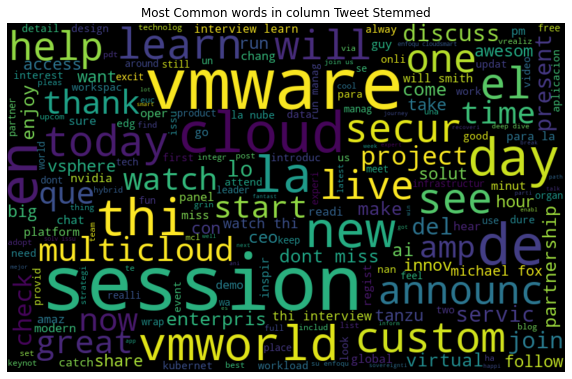

In [95]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

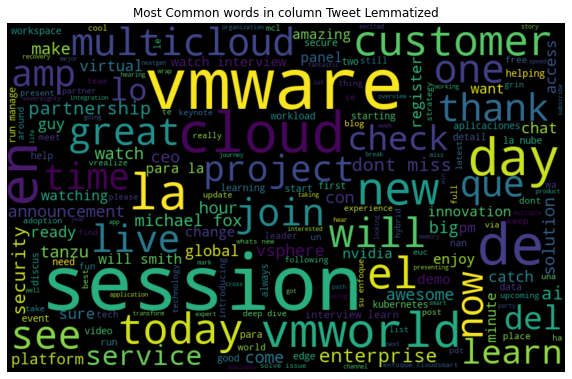

In [96]:
all_words = ' '.join([text for text in df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [98]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(df['tweet_stemmed'])
bow_stem

<254x378 sparse matrix of type '<class 'numpy.int64'>'
	with 1744 stored elements in Compressed Sparse Row format>

In [99]:
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(df['tweet_lemmatized'])
bow_lemm

<254x379 sparse matrix of type '<class 'numpy.int64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [100]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [101]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(df['tweet_stemmed'])
tfidf_stem

<254x378 sparse matrix of type '<class 'numpy.float64'>'
	with 1744 stored elements in Compressed Sparse Row format>

In [102]:
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm = tfidf_vectorizer.fit_transform(df['tweet_lemmatized'])
tfidf_lemm

<254x379 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

**Sentiment Analysis**

In [103]:
!pip3 install vaderSentiment

In [104]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [105]:
score = 0
positive = 0
negative = 0
neutral = 0

tweetsWithSent = []
for text in df['tweet_lemmatized']:
   ps = analyzer.polarity_scores(text)

   k = score
   score += ps['compound']

   if score>k:
     positive+=1
   elif score<k:
     negative+=1
   else:
     neutral+=1

   tweetsWithSent.append({'text':text, 'compound':ps['compound']})

# Calculating average sentiment score for the day
avg = score / (len(df['tweet_lemmatized']))
print(avg)

print("Sentiments analysis of a particular VMworld day")
print("positive: ", positive)
print("negative: ", negative)
print("neutral: ", neutral)

0.31728897637795267
Sentiments analysis of a particular VMworld day
positive:  151
negative:  14
neutral:  89


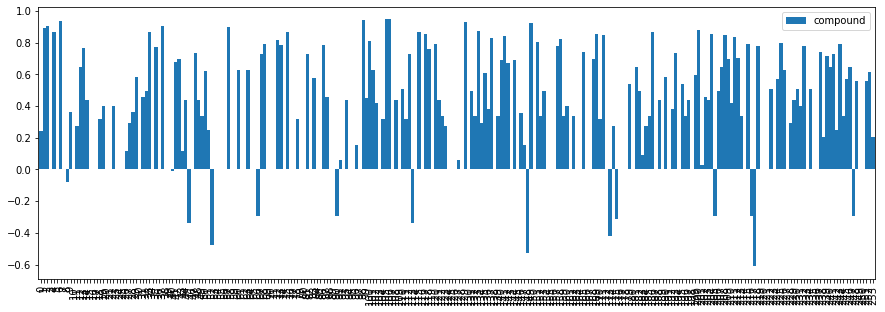

In [106]:
import pandas as pd
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15,5),width=1)